### Tree Counting using Local Maxima

This an attempt to automatically counting the tree based on local maxima package from skimage.

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage import exposure

Import the Canopy Height Model (CHM) dataset into python using GDAL

In [8]:
raster = 'test_data.tif'
with rasterio.open(raster) as source:
    img = source.read(1) # Read raster band 1 as a numpy array
    affine = source.affine

rescale image to percentile, in case we need to plot it.

In [9]:
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

Applied Local maximum filtering using module ndimage.maximum_filter() 

In [10]:
image_max = ndi.maximum_filter(image, size=7, mode='constant')

Locate maximum point based on peak_local_max

In [11]:
coordinates = peak_local_max(image, min_distance=2)
X=coordinates[:, 1]
y=coordinates[:, 0]

Apply affine projection.

In [12]:
xs, ys = affine * (X, y)

# create some datasheet
df = pd.DataFrame({'X':xs, 'Y':ys})

# count trees
count = df['X'].count()
print('Total trees : {i}'.format(i = count))

#Save file into csv
df.to_csv(r'test_output.csv')


Total trees : 620


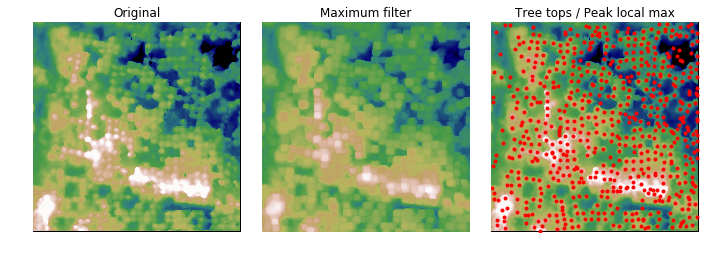

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10), sharex=True, sharey=True)
cmap=plt.cm.gist_earth
ax = axes.ravel()
ax[0].imshow(img_rescale, cmap)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(img_rescale, cmap)
ax[2].autoscale(False)
ax[2].plot(X,y, 'r.')
ax[2].axis('off')
ax[2].set_title('Tree tops / Peak local max')

fig.tight_layout()
plt.show()